<a href="https://colab.research.google.com/github/Vishvaish/Machine-Learning-Models/blob/main/KNN_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN Regression**
KNN regression is a non-parametric regression method that uses the K-nearest neighbors to predict the value of a continuous target variable.

# **Intention**

1. The code is to implements a K-nearest neighbors (KNN) regression model on a dataset containing advertising data with three features (YouTube, Facebook, and Newspaper) and one target variable (Sales).

2. The code loads the dataset, separates the features and target variable, and normalizes the features. It defines a function knn_regression() that takes in the training data, test data, and the number of nearest neighbors to consider and returns the predicted value of the target variable using the KNN regression algorithm.

3. The code then uses the function knn_regression() to make predictions on the test data, calculates the R-squared value between the actual and predicted target values, and adds the predicted values to the original dataset.

4. Finally, the code plots the actual and predicted values of the target variable to visualize the performance of the model.

5. The intention of the code is to train and evaluate a KNN Regression model on the advertising dataset and predict the sales based on the three features. The code show the How to implement KNN Regression from the scratch. 




   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88
R-squared: 0.9402322192125833

Predicted values of Y:
   sales  Y_pred
0  12.60  12.960
1  25.68  24.840
2  14.28  14.040
3  11.52  11.784
4  20.88  21.672


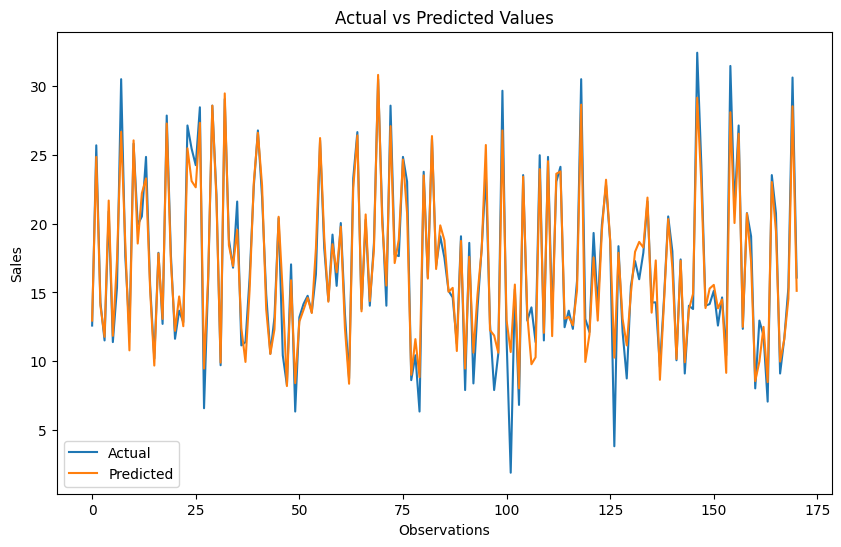

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/Marketing_Data.csv')
print(data.head())

# Separate the features and target variable
X = data[['youtube', 'facebook', 'newspaper']]
y = data['sales']

# Normalize the features
X = (X - X.mean()) / X.std()

# Define the KNN regression function
def knn_regression(X_train, y_train, x_test, k):
    # Calculate the distances between x_test and all X_train
    distances = np.sqrt(((X_train - x_test) ** 2).sum(axis=1))
    
    # Sort the distances and get the indices of the k nearest neighbors
    idx = distances.argsort()[:k]
    
    # Take the mean of y_train for the k nearest neighbors
    return y_train.iloc[idx].mean()
    
# Make predictions using KNN regression
k = 5  # number of nearest neighbors
predictions = []
for i in range(len(X)):
    x_test = X.iloc[i]
    y_pred = knn_regression(X.drop(i), y.drop(i), x_test, k)
    predictions.append(y_pred)

# Calculate the R-squared value
ss_res = ((y - predictions) ** 2).sum()
ss_tot = ((y - y.mean()) ** 2).sum()
r_squared = 1 - (ss_res / ss_tot)

# Add the predicted values to the DataFrame
data['Y_pred'] = predictions

# Print the results
print('R-squared:', r_squared)
print('\nPredicted values of Y:')
print(data[['sales', 'Y_pred']].head())

# ploting the actual and predicted
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.xlabel('Observations')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Values')
plt.show()

# **Inference**

1. The inference from the code is that the KNN regression model performs reasonably well on the dataset, as evidenced by the high R-squared value and the close match between the actual and predicted values of the target variable in the plot.

2. However, the code does not optimize the hyperparameters or cross-validate the model, so it is possible that the performance could be improved if we done this hyperparameter tuning.


# **Pros of KNN Regression:**

1. No assumptions: KNN does not make any assumptions about the underlying data distribution or relationship between variables, making it very flexible and adaptable to different types of data.

2. Easy to understand: The KNN algorithm is very easy to understand and implement, making it a good choice for beginners or those new to machine learning.

3. Non-linear: KNN can model non-linear relationships between variables, making it useful for data that doesn't follow a linear pattern.

4. Versatile: KNN can be used for both regression and classification problems, making it a versatile algorithm.

5. No training time: KNN does not require any training time, making it useful for situations where you need to quickly make predictions on new data.


---


#**Cons of KNN Regression:**

1. Computationally expensive: KNN can be computationally expensive, especially for large datasets or high-dimensional data. This is because the algorithm needs to calculate the distance between each observation and all other observations in the dataset.

2. Curse of dimensionality: The accuracy of KNN can decrease as the number of dimensions or features in the data increases. This is known as the "curse of dimensionality".

3. Sensitivity to outliers: KNN is sensitive to outliers in the data, which can negatively impact its performance.

4. Need for feature scaling: KNN requires all features to be on the same scale, which may require feature scaling or normalization prior to modeling.

5. Choosing the optimal value of k: The value of k in KNN is a hyperparameter that needs to be tuned. Choosing an optimal value of k can be challenging, and can impact the performance of the model.